### Importing Libraries

In [1]:
import collections
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [3]:
from plotly.offline import plot
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

The data has been acquired from Kaggle open datasets. It is a raw dataset named “indian_food”, which represents entirety of the testing data for August 5th to October 5th, 2020. 

Independent Variables- Actual measurement parameters of an Indian Dish which are name, ingredients, prep_time, cook_time, flavor_profile, course, state, region.

Dependent Variable- Classification of dish as part of the diet(vegetarian and non-vegetarian).


In [4]:
df = pd.read_csv('indian_food.csv')
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [5]:
df.shape

(255, 9)

### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


It can be seen that only cook_time and prep_time are numeric continious variables. Others are categorical variables which needs to be one-hot encoded before model building.

In [7]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Text(0.5, 1.0, 'flavor_profile countplot')

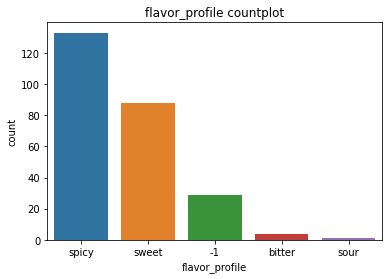

In [8]:
fig_flavorprofile = sns.countplot(data=df, x="flavor_profile", order = df['flavor_profile'].value_counts().index)
fig_flavorprofile.set_title("flavor_profile countplot")

The below diagram shows the distribution of dishes in terms of the flavor profile. There is an imbalance in the distribution as can be seen from the numbers.
Imbalance - The clean dataset has an imbalance of 226:29 for Vegetarian: Non-Vegetarian. This is handled by SMOTE so that it does not lead to overfitting of vegetarian data points. The other solution for this is more data.

In [9]:
pie_chart = df.diet.value_counts().reset_index()
pie_chart.columns = ['diet','count']
fig = px.pie(pie_chart, values='count', names='diet', title='Vegetarian and Non-Vegetarian dishes Ratio')
fig.show()

In [10]:
ingredients = []
for i in range(len(df)):
    single_dish_ingredients =  df["ingredients"][i]
    ingredients = ingredients + [word.lower() for word in nltk.word_tokenize(single_dish_ingredients) if not word in ['.', ',']]
    
print(ingredients)

['maida', 'flour', 'yogurt', 'oil', 'sugar', 'gram', 'flour', 'ghee', 'sugar', 'carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins', 'flour', 'ghee', 'kewra', 'milk', 'clarified', 'butter', 'sugar', 'almonds', 'pistachio', 'saffron', 'green', 'cardamom', 'milk', 'powder', 'plain', 'flour', 'baking', 'powder', 'ghee', 'milk', 'sugar', 'water', 'rose', 'water', 'sugar', 'syrup', 'lentil', 'flour', 'maida', 'corn', 'flour', 'baking', 'soda', 'vinegar', 'curd', 'water', 'turmeric', 'saffron', 'cardamom', 'cashews', 'ghee', 'cardamom', 'sugar', 'milk', 'cottage', 'cheese', 'sugar', 'milk', 'rice', 'sugar', 'dried', 'fruits', 'gram', 'flour', 'ghee', 'sugar', 'yogurt', 'milk', 'nuts', 'sugar', 'refined', 'flour', 'besan', 'ghee', 'powdered', 'sugar', 'yoghurt', 'green', 'cardamom', 'firm', 'white', 'pumpkin', 'sugar', 'kitchen', 'lime', 'alum', 'powder', 'rice', 'sugar', 'nuts', 'condensed', 'milk', 'sugar', 'spices', 'nuts', 'semolina', 'ghee', 'nuts', 'milk', 'khoa', 'coconut', 'molu',

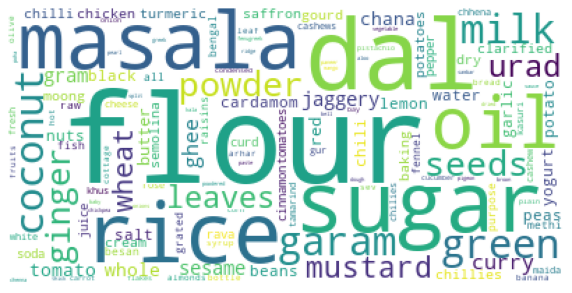

In [11]:
word_freq={}
word_freq = collections.Counter(ingredients)
W = WordCloud(background_color="white").fit_words(word_freq)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(W)
plt.axis('off')
plt.show()

#### The diagram below shows the ingredients used majorly  in the preparation of Indian dishes.

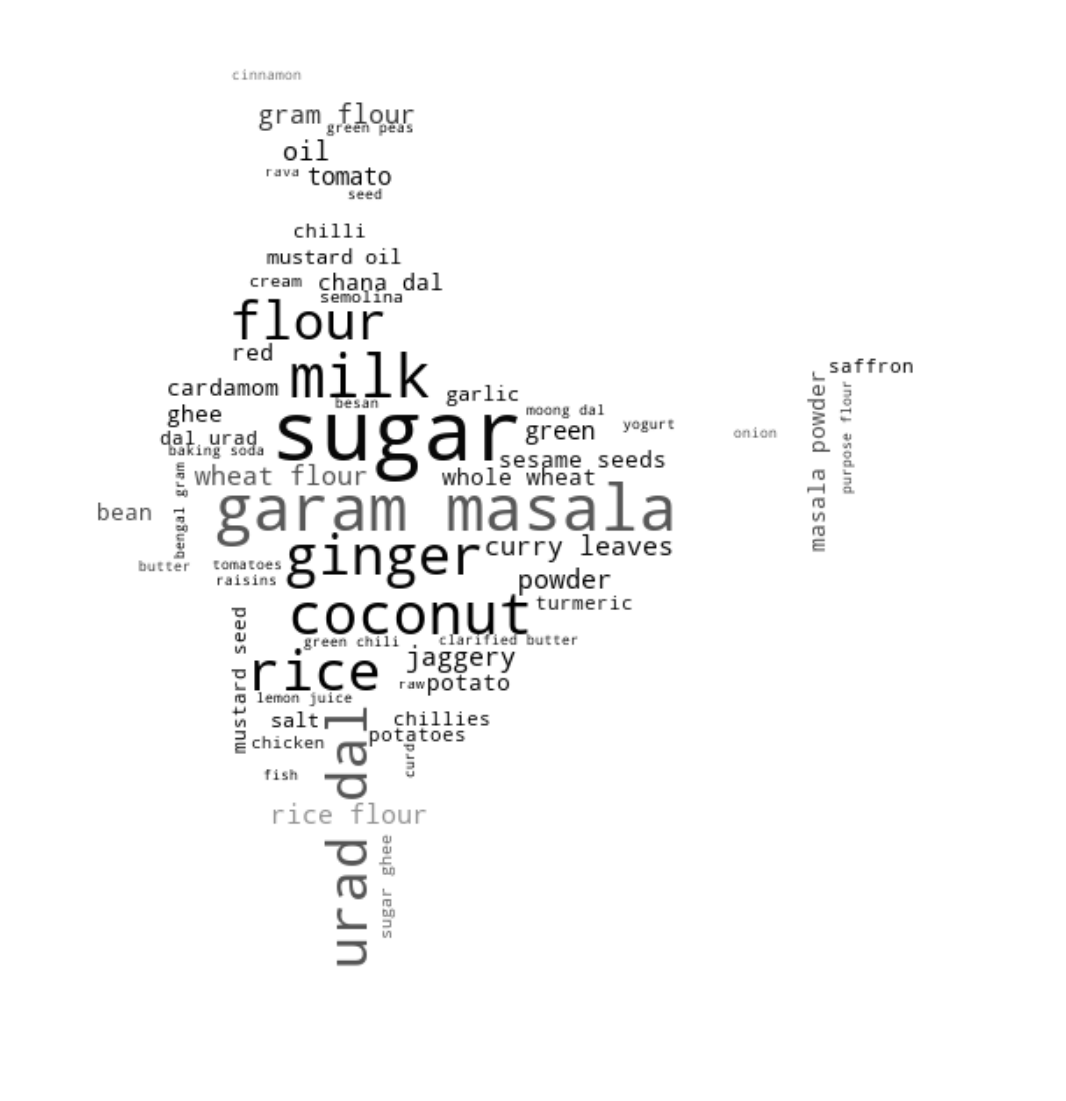

In [12]:
for i in range(0,len(ingredients)):
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('ind.jpg'))

wc = WordCloud(background_color="white", width = 400, height = 400, mask=india_coloring, min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (20, 20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
words = np.array(list(word_freq.keys()))
print(words)

['maida' 'flour' 'yogurt' 'oil' 'sugar' 'gram' 'ghee' 'carrots' 'milk'
 'cashews' 'raisins' 'kewra' 'clarified' 'butter' 'almonds' 'pistachio'
 'saffron' 'green' 'cardamom' 'powder' 'plain' 'baking' 'water' 'rose'
 'syrup' 'lentil' 'corn' 'soda' 'vinegar' 'curd' 'turmeric' 'cottage'
 'cheese' 'rice' 'dried' 'fruits' 'nuts' 'refined' 'besan' 'powdered'
 'yoghurt' 'firm' 'white' 'pumpkin' 'kitchen' 'lime' 'alum' 'condensed'
 'spices' 'semolina' 'khoa' 'coconut' 'molu' 'leaf' 'dry' 'chhena'
 'chenna' 'cream' 'lemon' 'juice' 'flakes' 'fried' 'power' 'fennel'
 'seeds' 'jaggery' 'wheat' 'sweetened' 'reduced' 'vegetable' 'elachi'
 'and' 'peanuts' 'dharwadi' 'buffalo' 'loaf' 'bread' 'salt' 'black'
 'lentils' 'mung' 'bean' 'skimmed' 'chickpeas' 'chana' 'dal' 'apricots'
 'vermicelli' 'pudding' 'banana' 'khus-khus' 'cucumber' 'rava' 'fish'
 'potol' 'tomato' 'chillies' 'ginger' 'garlic' 'boiled' 'pork' 'onions'
 'axone' 'cauliflower' 'potato' 'garam' 'masala' 'curry' 'leaves' 'crumbs'
 'peas' 'fen

In [14]:
def create_ingredientsVector(ingredients):
    ingredients_vec = np.zeros(words.shape)
    ingredients = set([word.lower() for word in nltk.word_tokenize(ingredients) if not word in ['.', ',']])
    for ingredient in ingredients:
        idx = np.where(words == ingredient)
        ingredients_vec[idx] = 1
    return ingredients_vec.tolist()

In [15]:
df["ingredients_vec"] = df["ingredients"].map(create_ingredientsVector)
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region                                    ingredients_vec  
0   East  [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
1   West  [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
2  North  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
3   West  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...  
4   East  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...

The ingredients need to be tokenized for further analysis. This is the most important feature of the model where the diet is predicted mainly using the ingredients. The food ingredients are taken and vectors are created for each and every dish. This is similar to label encoding. This is done so that the algorithm can process the contents of the dish in the prediction process. The vectors are of the shape (255, 337) or (no of dishes, no of total ingredients).

In [16]:
ingredients_vecs = []
for i in range(len(df)):
    ingredients_vecs.append(df["ingredients_vec"][i])
    
ingredients_vecs = np.array(ingredients_vecs)

In [17]:
print(ingredients_vecs.shape)

(255, 337)


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cos_simi_matrix = cosine_similarity(ingredients_vecs, ingredients_vecs)

Text(0.5, 1.0, 'Cosine Similarity of Ingredient Vectors')

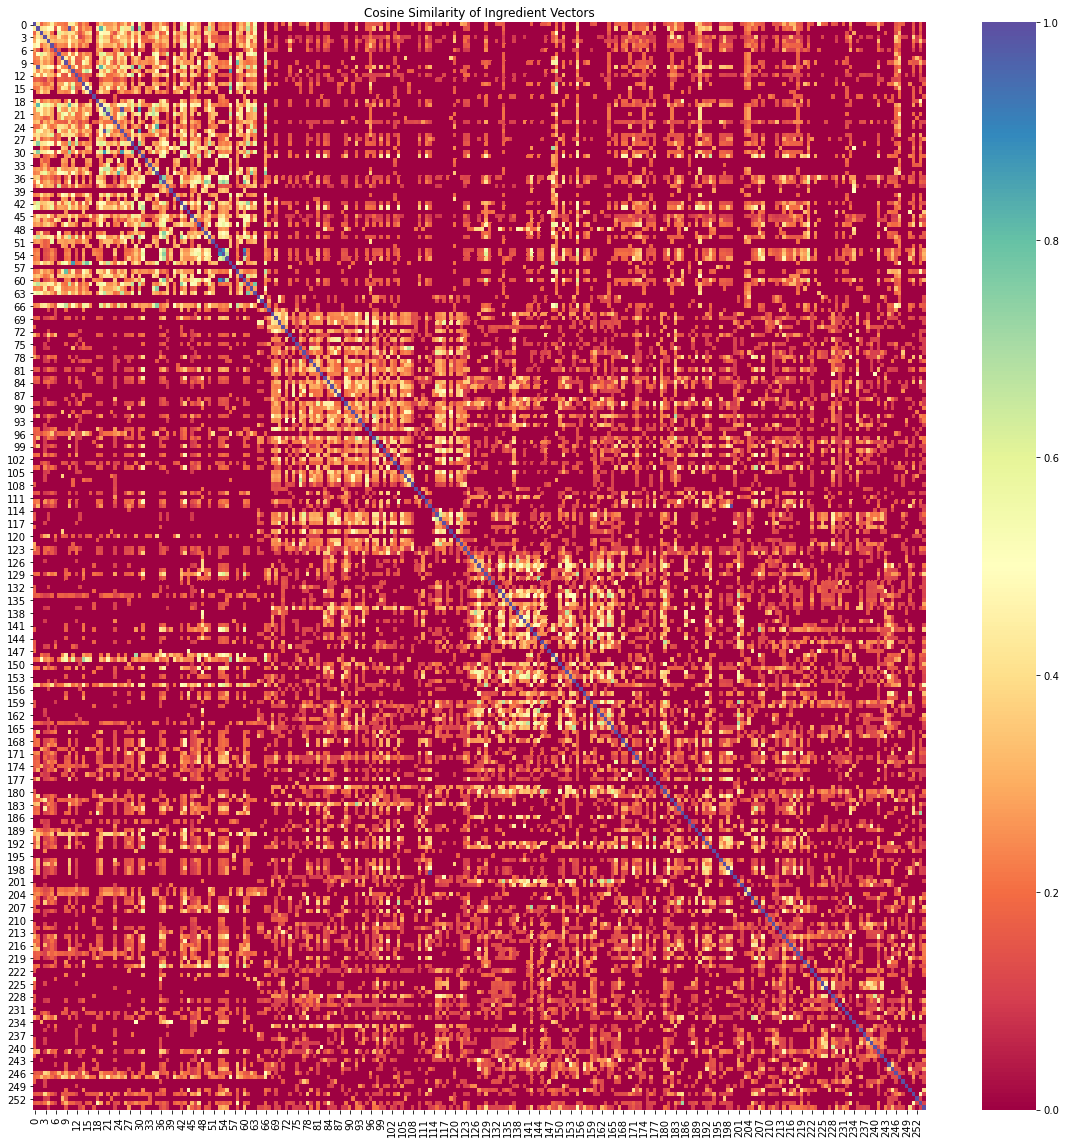

In [19]:
plt.figure(figsize=(20, 20))
fig = sns.heatmap(cos_simi_matrix, cmap="Spectral")
fig.set_title("Cosine Similarity of Ingredient Vectors")

Correlation - The correlation heatmap was used to check the correlation between the features and no highly correlated feature were indicated. All correlations are less than 0.8, indicating low correlation.

In the Heatmap 0 - 66th (these numbers correspond to index of "data frame") ingredients vectors have high cosine similarity each other. Cosine similarity to calculate similarity of ingredient vectors. If cosine similarity between two foods is high, it can be inferred that dishes are similar.

In [20]:
df[df['name'].isin(['Kheer', 'Phirni', 'Rabri'])]

name                          ingredients        diet  prep_time  \
9    Kheer      Milk, rice, sugar, dried fruits  vegetarian         10   
14  Phirni                    Rice, sugar, nuts  vegetarian         30   
15   Rabri  Condensed milk, sugar, spices, nuts  vegetarian         10   

    cook_time flavor_profile   course          state region  \
9          40          sweet  dessert             -1     -1   
14         20          sweet  dessert         Odisha   East   
15         45          sweet  dessert  Uttar Pradesh  North   

                                      ingredients_vec  
9   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...  
14  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
15  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...

Ingredient vectors are used to check the cosine similarity between 2 dishes. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two vectors are far apart by the Euclidean distance, chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [21]:
cosine_similarity([ingredients_vecs[9]], [ingredients_vecs[14]])

array([[0.51639778]])

In [22]:
cosine_similarity([ingredients_vecs[14]], [ingredients_vecs[15]])

array([[0.51639778]])

As seen above the dishes at location 9, 14, and 15 are sweet dishes and have very similar ingredients. Therefore the cosine similarity between the ingredient vectors is high, indicating actual closeness between the dishes.

In [23]:
df.iloc[30]['name']

'Pantua'

In [24]:
cosine_similarity([ingredients_vecs[9]], [ingredients_vecs[30]])

array([[0.2236068]])

As seen above the dich at location 30 is a savory dish compared to a sweet dish. Therefore having a small cosine similarity between them, Indicating no actual closeness between the contents of the dishes.

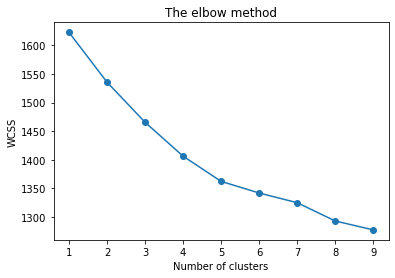

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(ingredients_vecs)
    wcss.append(kmeans.inertia_)

#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

It is a supervised learning problem but we would like to see in haow may categories would a dish be categorised given that the data set was not labelled. For This we use K-means algorithm. It is a clustering algorithm which searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.

In [26]:
#Create Silhouette Coefficients
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(ingredients_vecs)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ingredients_vecs, label, metric='euclidean')
    print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters= 2, The Silhouette Coefficient is 0.09492531747643693
For n_clusters= 3, The Silhouette Coefficient is 0.05158870015669986
For n_clusters= 4, The Silhouette Coefficient is 0.03304555196304871
For n_clusters= 5, The Silhouette Coefficient is 0.04614604315634691
For n_clusters= 6, The Silhouette Coefficient is 0.05201535279374043
For n_clusters= 7, The Silhouette Coefficient is 0.051184780857399435
For n_clusters= 8, The Silhouette Coefficient is 0.048707490867506496
For n_clusters= 9, The Silhouette Coefficient is 0.0390869605063667


Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. 
In the set of Silhouette score where ever there is an abrupt change that is the point of optimal number of clusters. 

In [27]:
food_vocab = set()

for ingredients in df['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [28]:
len(food_vocab)

365

In [29]:
print(food_vocab)

{'hot water', 'ginger and garlic', 'carrot', 'green chili paste', 'mustard oil', 'marinade', 'sauce', 'bhatura', 'french beans', 'sesame seeds', 'red onion', 'ginger', 'rose syrup', 'bengal gram flour', 'nestle cream', 'khaman', 'rice', 'gravy', 'coconut flakes', 'rapeseed oil', 'wine vinegar', 'cardamom powder', 'soy sauce', 'shimla mirch', 'milk powder', 'arrowroot powder', 'yellow mustard', 'beef', 'aloo', 'toor dal', 'litre milk', 'orange rind', 'dharwadi buffalo milk', 'fermented bamboo shoot', 'mung bean', 'atta', 'dry dates', 'dry fruits', 'coconut', 'pearl onions', 'chia seed', 'sabudana', 'black pepper', 'split pigeon peas', 'khus khus', 'star anise', 'elachi', 'water', 'fish fillet', 'peanuts', 'ginger powder', 'fennel seeds', 'raw banana', 'mushroom', 'egg yolks', 'plain flour', 'urad dal', 'sunflower oil', 'green chili', 'green chilies', 'dried rose petals', 'boondi', 'green', 'sweet potato', 'falooda sev', 'lentils', 'steamer', 'onions', 'condensed milk', 'bell pepper', 'a

The ingredients of in the food are extracted and a vector dataframe is created using the ingredients. Each row is a vector that represents the ingredients in the dish.

In [30]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(df['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [31]:
food_columns

maida flour  yogurt  oil  sugar  gram flour  ghee  carrots  milk  \
0            1.0     1.0  1.0    1.0         0.0   0.0      0.0   0.0   
1            0.0     0.0  0.0    1.0         1.0   1.0      0.0   0.0   
2            0.0     0.0  0.0    1.0         0.0   1.0      1.0   1.0   
3            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
4            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
..           ...     ...  ...    ...         ...   ...      ...   ...   
250          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
251          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
252          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
253          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
254          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   

     cashews  raisins  ...  soaked rice  cardamom pods  red pepper  \
0        0.0      0.0  ...          0.0            0.0         0.0   
1        0.0      0.0  ...          0.0            0.0         0.0   
2        1.0      1.0  ...          0.0            0.0         0.0   
3        0.0      0.0  ...          0.0            0.0         0.0   
4        0.0      0.0  ...          0.0            0.0         0.0   
..       ...      ...  ...          ...            ...         ...   
250      0.0      0.0  ...          0.0            0.0         0.0   
251      0.0      0.0  ...          0.0            0.0         0.0   
252      0.0      0.0  ...          0.0            0.0         0.0   
253      0.0      0.0  ...          0.0            0.0         0.0   
254      0.0      0.0  ...          0.0            0.0         0.0   

     watercress  glutinous rice  egg yolks  dry dates  dried rose petals  \
0           0.0             0.0        0.0        0.0                0.0   
1           0.0             0.0        0.0        0.0                0.0   
2           0.0             0.0        0.0        0.0                0.0   
3           0.0             0.0        0.0        0.0                0.0   
4           0.0             0.0        0.0        0.0                0.0   
..          ...             ...        ...        ...                ...   
250         0.0             1.0        0.0        0.0                0.0   
251         0.0             0.0        1.0        0.0                0.0   
252         0.0             0.0        0.0        1.0                1.0   
253         0.0             0.0        0.0        0.0                0.0   
254         0.0             0.0        0.0        0.0                0.0   

     arrowroot powder  ginger powder  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
..                ...            ...  
250               0.0            0.0  
251               0.0            0.0  
252               0.0            0.0  
253               1.0            0.0  
254               0.0            1.0  

[255 rows x 365 columns]

In [32]:
data = pd.read_csv('indian_food.csv')
data = data.drop(['name', 'ingredients'], axis=1)

The column name is removed because it provdes no information to the model. Ingredients feature is removed and instead of the ingedients the vector equivalent of the ingredients would be used.

In [33]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

Unique values are confirmed in all the categorical variables in the dataset. It can be seen that there are "-1" values in the dataset the needs to be removed.

In [34]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

The "-1" values in the dataset are replaced with NaN. This would be later replaced with the mean of the corresponding feature for the continious numerical features.

In [35]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [36]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

'flavor_profile', 'course', 'state', 'region' are one hot encoded for model building.

In [37]:
data

diet  prep_time  cook_time  f_bitter  f_sour  f_spicy  f_sweet  \
0    vegetarian         45         25         0       0        0        1   
1    vegetarian         80         30         0       0        0        1   
2    vegetarian         15         60         0       0        0        1   
3    vegetarian         15         30         0       0        0        1   
4    vegetarian         15         40         0       0        0        1   
..          ...        ...        ...       ...     ...      ...      ...   
250  vegetarian          5         30         0       0        0        1   
251  vegetarian         20         60         0       0        0        1   
252  vegetarian         -1         -1         0       0        0        1   
253  vegetarian         20         45         0       0        0        1   
254  vegetarian         -1         -1         0       0        0        1   

     c_dessert  c_main course  c_snack  ...  s_Tripura  s_Uttar Pradesh  \
0            1              0        0  ...          0                0   
1            1              0        0  ...          0                0   
2            1              0        0  ...          0                0   
3            1              0        0  ...          0                0   
4            1              0        0  ...          0                0   
..         ...            ...      ...  ...        ...              ...   
250          1              0        0  ...          0                0   
251          1              0        0  ...          0                0   
252          1              0        0  ...          0                0   
253          1              0        0  ...          0                0   
254          1              0        0  ...          0                0   

     s_Uttarakhand  s_West Bengal  r_Central  r_East  r_North  r_North East  \
0                0              1          0       1        0             0   
1                0              0          0       0        0             0   
2                0              0          0       0        1             0   
3                0              0          0       0        0             0   
4                0              1          0       1        0             0   
..             ...            ...        ...     ...      ...           ...   
250              0              0          0       0        0             1   
251              0              0          0       0        0             0   
252              0              0          0       0        1             0   
253              0              0          1       0        0             0   
254              0              0          0       0        0             0   

     r_South  r_West  
0          0       0  
1          0       1  
2          0       0  
3          0       1  
4          0       0  
..       ...     ...  
250        0       0  
251        0       1  
252        0       0  
253        0       0  
254        0       1  

[255 rows x 41 columns]

In [38]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [39]:
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [40]:
label_encoder = LabelEncoder()
data['diet'] = label_encoder.fit_transform(data['diet'])

In [41]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

### Model Building & Evaluation

### Neural Network using Keras Sequential Model

In [42]:
y = data['diet']
X = data.drop('diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [43]:
food_columns.shape

(255, 365)

In [44]:
sc = StandardScaler()

X = sc.fit_transform(X)
X_food = sc.fit_transform(X_food)

Standard Scaler is used to standardize and normalize the values in the dataset.

In [45]:
X_food.shape

(255, 405)

In [46]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size=0.7, random_state=42)
X_food_train_smt,y_food_train_smt = smt.fit_resample(X_food_train,y_food_train)

Train Test split is used to create 2 sets to data. First without ingredient vector dataframe attached and sencond with the ingredient vector dataframe appended to the other normalized and encoded features. SMOTE analysis is used to comensate the under-represented class's data points. After SMOTE we have 156 data points for both classes.

In [47]:
print('Train Data - Class Split - Without Ingredient Vectors')
Outcome_0= (y_train_smt == 0).sum()
Outcome_1 = (y_train_smt == 1).sum()
print('Class 0 (Non Vegetarian)-',  Outcome_0)
print('Class 1 (Vegetarian)-',  Outcome_1)
print('\n')
print('Train Data - Class Split - With Ingredient Vectors')
Outcome_0= (y_food_train_smt == 0).sum()
Outcome_1 = (y_food_train_smt == 1).sum()
print('Class 0 (Non Vegetarian)-',  Outcome_0)
print('Class 1 (Vegetarian)-',  Outcome_1)

Train Data - Class Split - Without Ingredient Vectors
Class 0 (Non Vegetarian)- 156
Class 1 (Vegetarian)- 156


Train Data - Class Split - With Ingredient Vectors
Class 0 (Non Vegetarian)- 156
Class 1 (Vegetarian)- 156


### Importing Model Libraries

In [49]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer 
import tensorflow.keras.metrics

Using TensorFlow backend.


### Neural Network

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. Neural networks help us cluster and classify.In a neural network a single perceptron (neuron) can be imagined as a Logistic Regression. Artificial Neural Network, or ANN, is a group of multiple perceptrons/ neurons at each layer. ANN is also known as a Feed-Forward Neural network because inputs are processed only in the forward direction.

It consists of 3 layers – Input, Hidden and Output. The input layer accepts the inputs, the hidden layer processes the inputs, and the output layer produces the result. Essentially, each layer tries to learn certain weights.

In [50]:
def build_model(num_features, hidden_layer_sizes=(64, 64)):

    model = Sequential()
    model.add(InputLayer(input_shape=(num_features, )))
    model.add(Dense(hidden_layer_sizes[0], activation='relu'))
    model.add(Dense(hidden_layer_sizes[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tensorflow.keras.metrics.AUC(name='auc')])
    
    model.summary()
    
    return model

The First model is an Neiral Network which is created with the dataset without the ingredient vectors appended. It has has 4 layers Input, Output and 2 hidden layers. The input layers has the size equivalent to the number of features in the dataset. In this case 40. The batch size is kept 64 and the the number of epochs is defined as 41.

In [51]:
X.shape

(255, 40)

In [52]:
model = build_model(40)

batch_size = 64
epochs = 41

history = model.fit(
    X_train_smt,
    y_train_smt,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________
Train on 249 samples, validate on 63 samples
Epoch 1/41
249/249 [==============================] - 2s 8ms/sample - loss: 0.6327 - accuracy: 0.6586 - auc: 0.8682 - val_loss: 0.4757 - val_accuracy: 0.9841 - val_auc: 0.0000e+00
Epoch 2/41
249/249 [==============================] - 0s 189us/sample - loss: 0.5209 - accuracy: 0.8394 - auc: 0.9478 - val_loss: 0.4829 - val_accuracy: 0.9683

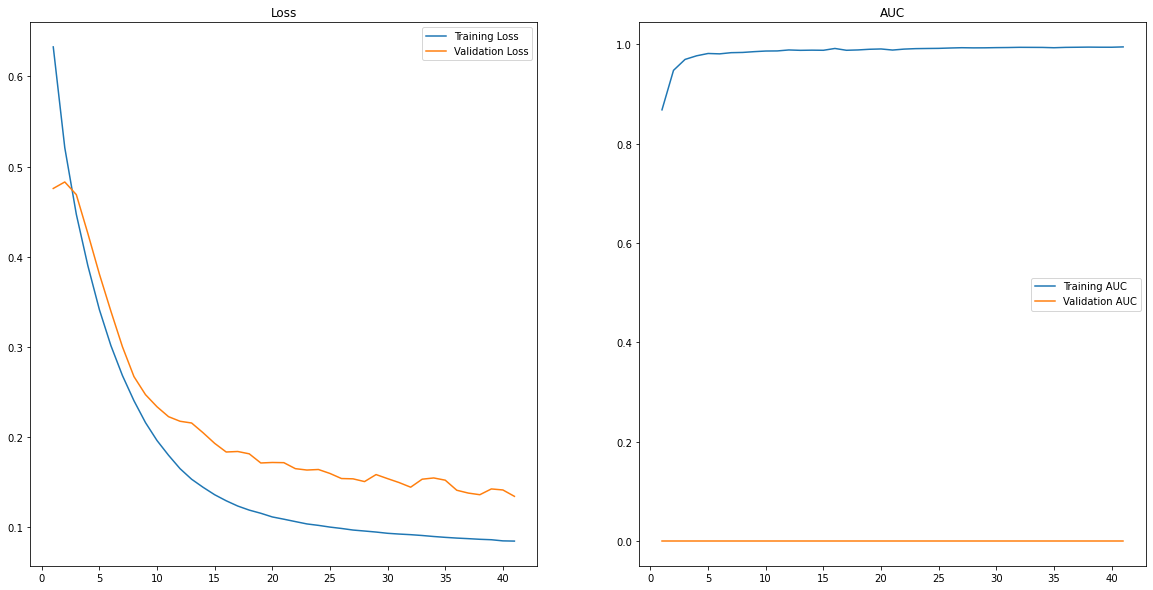

In [53]:
plt.figure(figsize=(20, 10))

epochs_range = range(1, epochs + 1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

The performance of the model is plotted. As it can be seen

In the first plot the validation loss decreases with the training loss. At the end of the graph there are a few fluctuations. This is the optimum amount upto which the validation loss can be reduced. As it can be seen ahead that the position at which the loss is minimum is 40. So it cannot be reduced further.

The second graph shows the training AC vs the validation AUC. The training AUC increases initially and then becomes constant. But the validation AUC is constant which show the TPR-FPR (True Positive Rate - False Positive Rate) is constant. In addition the the point at which the value of AUC is maximum is 0.

In [54]:
print(np.argmin(val_loss), np.argmax(val_auc))

40 0


In [55]:
model.evaluate(X_test, y_test)

77/77 [==============================] - 0s 181us/sample - loss: 0.6198 - accuracy: 0.8571 - auc: 0.5490


[0.6197699362581427, 0.85714287, 0.5489796]

The average loss, accuracy and AUC are 0.486, 0.857, 0.682 respectively. The model has a good accuracy but a decent AUC.

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# confusion matrix
print('\nConfusion Matrix and Classification Report\n')
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)
target_names=['Class 0 - non-vegetarian','Class 1 - vegetarian']
print(classification_report(y_test, yhat_classes, target_names=target_names))


Confusion Matrix and Classification Report

[[ 2  5]
 [ 6 64]]
                          precision    recall  f1-score   support

Class 0 - non-vegetarian       0.25      0.29      0.27         7
    Class 1 - vegetarian       0.93      0.91      0.92        70

                accuracy                           0.86        77
               macro avg       0.59      0.60      0.59        77
            weighted avg       0.87      0.86      0.86        77



#### Model Evaluation

For Neural Network model evaluation Without the ingredient vectors The Confusion Matrix and Classification Report for the Standard Model gives the following results as seen:  <br/><br/>
•	For Class 0 (Non-Vegetarian), 2 identified correctly 6 identified incorrectly. <br/>
•	For Class 1 (Vegetarian), 64 identified correctly 5 identified incorrectly. <br/>
•	True Positives – Number of correctly predicted positive values is 2. <br/>
•	True Negatives - Number of correctly predicted negative values is 64. <br/>
•	False Positives – Number of negative values incorrectly predicted as positive values is 6. <br/>
•	False Negatives – Number of positive values incorrectly predicted as negative is 5. <br/><br/>
The model has overall Precision of 87% and overall Accuracy of 86% <br/>
The Precision for Class 0 / Non-Vegetarian is 25% due to large number of False positives.


In [57]:
X_food.shape

(255, 405)

The Second model is a Neural Network which is created with the dataset with the ingredient vectors appended. It has has 4 layers Input, Output and 2 hidden layers. The input layers has the size equivalent to the number of features in the dataset which includes the food vectors dataframe appended to the transformed dataframe. In this case 405. The batch size is kept 64 and the the number of epochs is defined as 200.

In [58]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

food_model = build_model(X_food.shape[1], hidden_layer_sizes=(128, 128))

food_batch_size = 64
food_epochs = 200

food_history = food_model.fit(
    X_food_train_smt,
    y_food_train_smt,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs
)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               51968     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 68,609
Trainable params: 68,609
Non-trainable params: 0
_________________________________________________________________
Train on 249 samples, validate on 63 samples
Epoch 1/200
249/249 [==============================] - 0s 1ms/sample - loss: 0.7470 - acc: 0.5502 - auc: 0.5601 - val_loss: 0.6891 - val_acc: 0.5873 - val_auc: 0.0000e+0

249/249 [==============================] - 0s 88us/sample - loss: 1.1958e-04 - acc: 1.0000 - auc: 1.0000 - val_loss: 1.2401e-04 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 84/200
249/249 [==============================] - 0s 87us/sample - loss: 1.1676e-04 - acc: 1.0000 - auc: 1.0000 - val_loss: 1.2137e-04 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 85/200
249/249 [==============================] - 0s 85us/sample - loss: 1.1391e-04 - acc: 1.0000 - auc: 1.0000 - val_loss: 1.1878e-04 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 86/200
249/249 [==============================] - 0s 96us/sample - loss: 1.1097e-04 - acc: 1.0000 - auc: 1.0000 - val_loss: 1.1623e-04 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 87/200
249/249 [==============================] - 0s 100us/sample - loss: 1.0836e-04 - acc: 1.0000 - auc: 1.0000 - val_loss: 1.1367e-04 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 88/200
249/249 [==============================] - 0s 113us/sample - loss: 1.0569e-04 - acc: 1.0000 - 

Epoch 173/200
249/249 [==============================] - 0s 134us/sample - loss: 2.3700e-05 - acc: 1.0000 - auc: 1.0000 - val_loss: 2.9170e-05 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 174/200
249/249 [==============================] - 0s 192us/sample - loss: 2.3384e-05 - acc: 1.0000 - auc: 1.0000 - val_loss: 2.8835e-05 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 175/200
249/249 [==============================] - 0s 189us/sample - loss: 2.3071e-05 - acc: 1.0000 - auc: 1.0000 - val_loss: 2.8483e-05 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 176/200
249/249 [==============================] - 0s 173us/sample - loss: 2.2784e-05 - acc: 1.0000 - auc: 1.0000 - val_loss: 2.8157e-05 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 177/200
249/249 [==============================] - 0s 154us/sample - loss: 2.2497e-05 - acc: 1.0000 - auc: 1.0000 - val_loss: 2.7828e-05 - val_acc: 1.0000 - val_auc: 0.0000e+00
Epoch 178/200
249/249 [==============================] - 0s 151us/sample - loss: 2.22

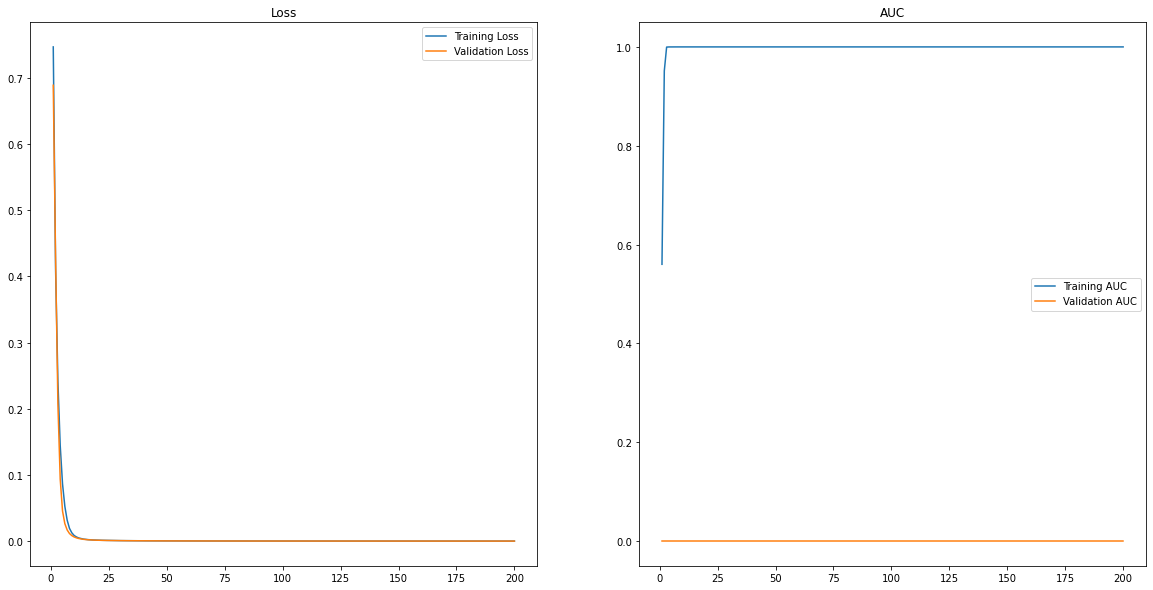

In [59]:
plt.figure(figsize=(20, 10))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

The performance of the model is plotted. As it can be seen

In the first plot the validation loss decreases with the training loss. Both the line alomost lie on top of each each other which shows that the model is training well. As it can be seen ahead that the position at which the loss is minimum is 199. So it cannot be reduced further.

The second graph shows the training AC vs the validation AUC. The training AUC increases initially and then becomes constant. But the validation AUC is constant which show the TPR-FPR (True Positive Rate - False Positive Rate) is constant. In addition the the point at which the value of AUC is maximum is 0.

In [60]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))

199 0


In [61]:
food_model.evaluate(X_food_test, y_food_test)

77/77 [==============================] - 0s 81us/sample - loss: 0.4889 - acc: 0.8442 - auc: 0.7867


[0.4888845519586043, 0.84415585, 0.7867347]

The average loss, accuracy and AUC are 0.267, 0.935, 0.89 respectively. The model has a good accuracy and AUC.

In [62]:
# predict probabilities for test set
yhat_probs = food_model.predict(X_food_test, verbose=0)
# predict crisp classes for test set
yhat_classes = food_model.predict_classes(X_food_test, verbose=0)
# confusion matrix
print('\nConfusion Matrix and Classification Report\n')
matrix = confusion_matrix(y_food_test, yhat_classes)
print(matrix)
target_names=['Class 0 - non-vegetarian','Class 1 - vegetarian']
print(classification_report(y_food_test, yhat_classes, target_names=target_names))


Confusion Matrix and Classification Report

[[ 3  4]
 [ 8 62]]
                          precision    recall  f1-score   support

Class 0 - non-vegetarian       0.27      0.43      0.33         7
    Class 1 - vegetarian       0.94      0.89      0.91        70

                accuracy                           0.84        77
               macro avg       0.61      0.66      0.62        77
            weighted avg       0.88      0.84      0.86        77



#### Model Evaluation

The Neural Network model evaluation With the ingredient vectors is shown below. The Confusion Matrix and Classification Report for the Standard Model gives the following results as seen: <br/> <br/> 
•	For Class 0 (Non-Vegetarian), 3 identified correctly 8 identified incorrectly.<br/> 
•	For Class 1 (Vegetarian), 62 identified correctly 4 identified incorrectly.<br/> 
•	True Positives – Number of correctly predicted positive values is 3.<br/> 
•	True Negatives - Number of correctly predicted negative values is 62.<br/>
•	False Positives – Number of negative values incorrectly predicted as positive values is 8. <br/> 
•	False Negatives – Number of positive values incorrectly predicted as negative is 4. <br/> <br/> 
The model has overall Precision of 88% and overall Accuracy of 84%. <br/> 
The Precision for Class 0 / Non-Vegetarian is 27% due to large number of False positives.


### Logistc Regression With PCA (Principal Component Analysis)

Logistic regression is a classification algorithm used when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval independent variables.

There are 405 features in the model which might affect the model due to high dimensionality. Therefore, for dimensionality reduction PCA(Principal Component analysis) is conducted. Principal component analysis computes a new set of variables (principal components) and expresses the data in terms of these new variables.

In [63]:
from sklearn.decomposition import PCA

pca_none = PCA(n_components=None,random_state=100)
X_pca = pca_none.fit(X_food, y)
pca_var_ratios = pca_none.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
            
    return n_components


n_comppca=select_n_components(pca_var_ratios, 0.95)

In [64]:
print(n_comppca)

175


In [65]:
pca = PCA(n_components=n_comppca,svd_solver='full')
transformed_data = pca.fit_transform(X_food)

x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(X_food, y, test_size = 0.2, random_state = 100)
x_train_log_smt,y_train_log_smt = smt.fit_resample(x_train_log,y_train_log)

Train Test split is used to create the training set. The dataset used is with the ingredient vector dataframe appended to the other normalized and encoded features. SMOTE analysis is used to comensate the under-represented class's data points. After SMOTE we have 182 data points for both classes.

In [66]:
print('Train Data - Class Split')
Outcome_0= (y_train_log_smt == 0).sum()
Outcome_1 = (y_train_log_smt == 1).sum()
print('Class 0 (Non Vegetarian)-',  Outcome_0)
print('Class 1 (Vegetarian)-',  Outcome_1)

Train Data - Class Split
Class 0 (Non Vegetarian)- 182
Class 1 (Vegetarian)- 182


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=100)
logreg.fit(x_train_log_smt,y_train_log_smt)
y_pred = logreg.predict(x_test_log)
target_names=['Class 0 - non-vegetarian','Class 1 - vegetarian']
print('\nNumber of PCA components:',n_comppca)
print('\nConfusion Matrix and Classification Report')
print('\n', confusion_matrix(y_test_log,y_pred))  
print('\n',classification_report(y_test_log,y_pred,target_names=target_names))
print('\n')


Number of PCA components: 175

Confusion Matrix and Classification Report

 [[ 7  0]
 [17 27]]

                           precision    recall  f1-score   support

Class 0 - non-vegetarian       0.29      1.00      0.45         7
    Class 1 - vegetarian       1.00      0.61      0.76        44

                accuracy                           0.67        51
               macro avg       0.65      0.81      0.61        51
            weighted avg       0.90      0.67      0.72        51





#### Model Evaluation

The Confusion Matrix and Classification Report for the Standard Model gives the following results as seen: <br/><br/> 
•	For Class 0 (Non-Vegetarian), 7 identified correctly 17  identified incorrectly. <br/>
•	For Class 1 (Vegetarian), 27 identified correctly 0 identified incorrectly. <br/>
•	True Positives – Number of correctly predicted positive values is 7. <br/>
•	True Negatives - Number of correctly predicted negative values is 27. <br/>
•	False Positives – Number of negative values incorrectly predicted as positive values is 17. <br/>
•	False Negatives – Number of positive values incorrectly predicted as negative is 0. <br/> <br/>
The model has overall Precision of 90% and overall Accuracy of 67% <br/>
The Precision for Class 0 / Non-Vegetarian is 29% due to large number of False positives. <br/>


ROC Curve


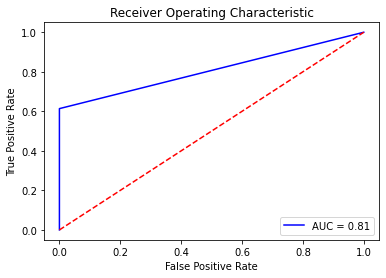

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test_log, y_pred)
auc_score = roc_auc_score(y_test_log, y_pred)
print('ROC Curve')
#Plot the ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values. The AUC score the model is 81% which is a good score as it explains that the model is 81% accurate in distinguishing between the positive and negative classes.

### Insights <br/>

The dataset used has some constraints as there are only 255 records with an imbalance in the number of samples provided. More balanced data could be used to better predict and answer the problem statement. The results of the model are able to classify the Vegetarian dishes with greater accuracy because of the bias<br />

The dataset was a clean dataset which did not require synthetics values being added to which is a good sign. <br />

There exsists a high multi-collinearity among the food vectors as evident from the heatmap. This showed that some of the dishes are hightly similar to the other dishes 
All all the features are kept for the model analysis and overall dimensionality reduction is conducted which produces good results for Logistic regression. For the Nerural Network model the Input layer shape is changed as per the data diensions<br /> 

A acuuracy of 100% for Class 1 (Logistic Regression) and 95% for Class 1 (Neural network) show that the model works well for the study under consideration.<br />

According to the problem statement the model works well classifying the Vegetarian dishes but not aacurate enough for non - vegetarian dishes because of the high imbalance.

In [69]:
import pickle
import joblib
capstone_1002_lg_model = 'capstone_1002_lg_model.pkl'
capstone_1002_lg_model_joblib = 'capstone_1002_lg_model.sav'

pickle.dump(logreg, open(capstone_1002_lg_model, 'wb'))
joblib.dump(logreg, capstone_1002_lg_model_joblib)


In [70]:
food_model.save("capstone_1002_tf_model.h5")